In [1]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


# Pregunta 1

In [1]:
import yfinance as yf

tesla_data = yf.download('TSLA', start='2022-01-01', end='2023-01-01')

tesla_data_reset = tesla_data.reset_index()

print(tesla_data_reset.head())

[*********************100%***********************]  1 of 1 completed

        Date        Open        High         Low       Close   Adj Close  \
0 2022-01-03  382.583344  400.356659  378.679993  399.926666  399.926666   
1 2022-01-04  396.516663  402.666656  374.350006  383.196655  383.196655   
2 2022-01-05  382.216675  390.113342  360.336670  362.706665  362.706665   
3 2022-01-06  359.000000  362.666656  340.166656  354.899994  354.899994   
4 2022-01-07  360.123322  360.309998  336.666656  342.320007  342.320007   

      Volume  
0  103931400  
1  100248300  
2   80119800  
3   90336600  
4   84164700  


In [4]:
pip install requests beautifulsoup4 pandas

Note: you may need to restart the kernel to use updated packages.


# Pregunta 2

In [3]:

import requests
from bs4 import BeautifulSoup
import pandas as pd

url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm'

response = requests.get(url)

soup = BeautifulSoup(response.text, 'html.parser')

tesla_revenue_table = soup.find('table')

if tesla_revenue_table is not None:
    rows = tesla_revenue_table.find_all('tr')

    dates = []
    revenues = []

    for row in rows[1:]:  # Skip the header
        cols = row.find_all('td')
        if len(cols) > 1:
            date = cols[0].text.strip()
            revenue = cols[1].text.strip().replace(',', '').replace('$', '')  # Clean the revenue data
            dates.append(date)
            revenues.append(float(revenue))

    tesla_revenue = pd.DataFrame({
        'Date': dates,
        'Revenue': revenues
    })

    print(tesla_revenue.tail())
else:
    print("TNo se encontro la taba.")



    Date  Revenue
8   2013   2013.0
9   2012    413.0
10  2011    204.0
11  2010    117.0
12  2009    112.0


# Pregunta 3

In [4]:
import yfinance as yf

gme_data = yf.download('GME', start='2022-01-01', end='2023-01-01')

gme_data_reset = gme_data.reset_index()

print(gme_data_reset.head())


[*********************100%***********************]  1 of 1 completed

        Date       Open       High        Low      Close  Adj Close    Volume
0 2022-01-03  37.307499  39.845001  37.302502  38.209999  38.209999   5654800
1 2022-01-04  38.042500  38.247501  35.762501  37.227501  37.227501   7339600
2 2022-01-05  37.097500  37.212502  32.287498  32.342499  32.342499  13585600
3 2022-01-06  33.209999  34.424999  30.285000  32.757500  32.757500  24206000
4 2022-01-07  39.942501  40.077499  33.125000  35.154999  35.154999  48549200


# Pregunta 4

In [11]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm'

response = requests.get(url)

soup = BeautifulSoup(response.text, 'html.parser')

gme_revenue_table = soup.find('table')

if gme_revenue_table is not None:
    rows = gme_revenue_table.find_all('tr')

    years = []
    revenues = []

    for row in rows[1:]:  
        cols = row.find_all('td')
        
            year = cols[0].text.strip()
            revenue = cols[1].text.strip().replace(',', '')  
            
            years.append(year)
            revenues.append(revenue)

    gme_revenue = pd.DataFrame({
        'Year': years,
        'Revenue': revenues
    })

    print(gme_revenue.tail())
else:
    print("GME revenue table not found on the page.")


    Year Revenue
8   2013   $2013
9   2012    $413
10  2011    $204
11  2010    $117
12  2009    $112


# Pregunta 5

[*********************100%***********************]  1 of 1 completed


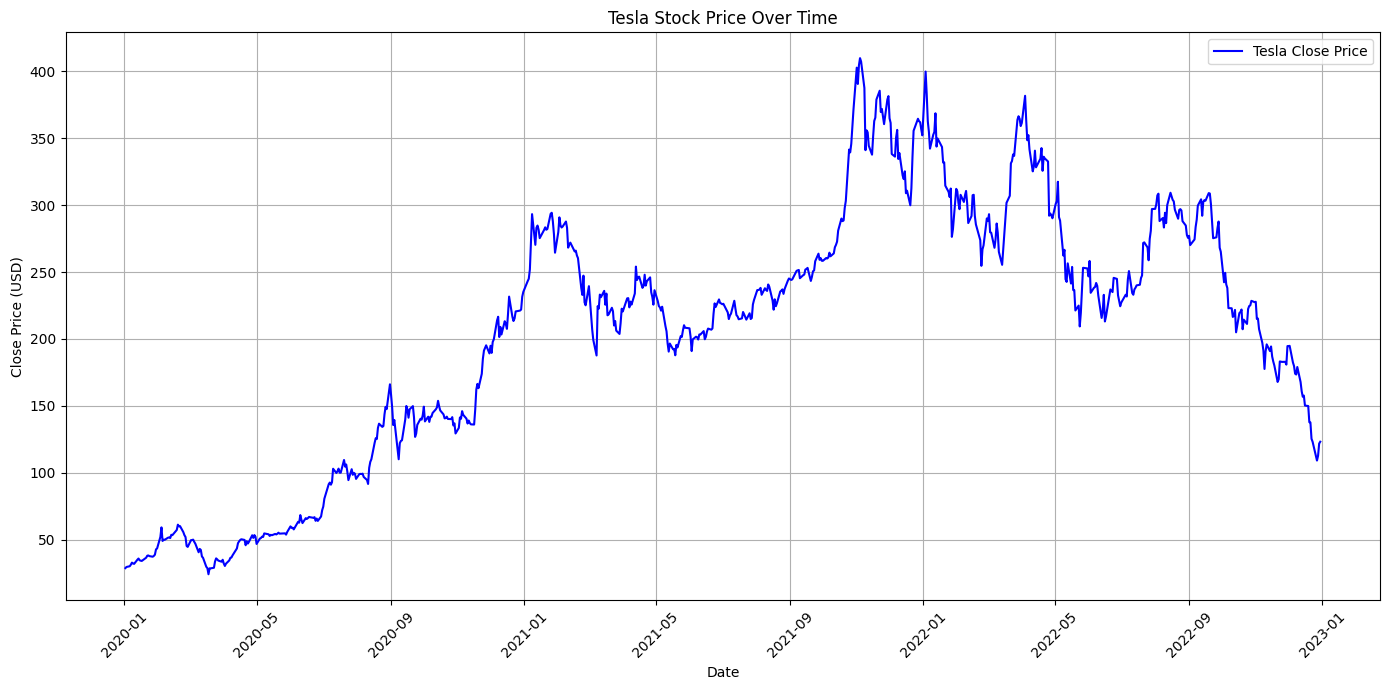

In [12]:
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf

tesla_data = yf.download('TSLA', start='2020-01-01', end='2023-01-01')

tesla_data.reset_index(inplace=True)

def make_graph(data):
    plt.figure(figsize=(14, 7))
    plt.plot(data['Date'], data['Close'], label='Tesla Close Price', color='blue')
    plt.title('Tesla Stock Price Over Time')
    plt.xlabel('Date')
    plt.ylabel('Close Price (USD)')
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid()
    plt.tight_layout()
    plt.show()

make_graph(tesla_data)


# Pregunta 6

[*********************100%***********************]  1 of 1 completed


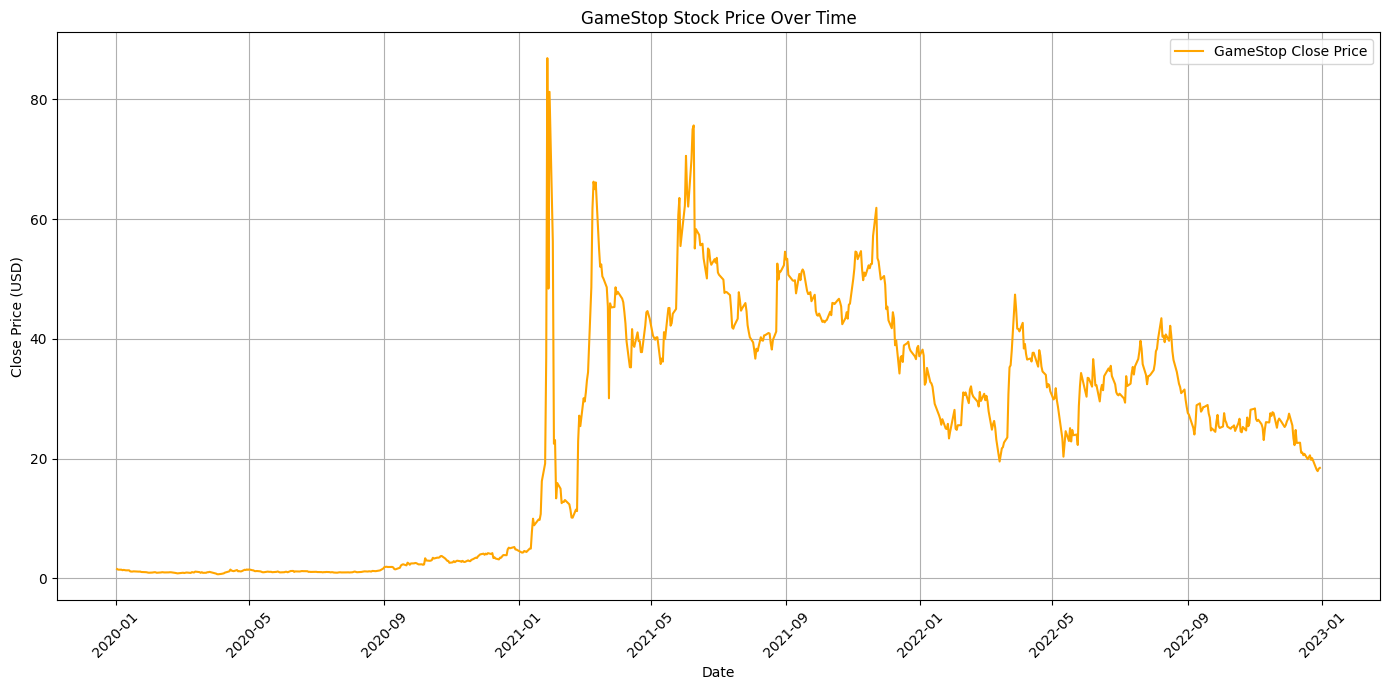

In [13]:
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf

gme_data = yf.download('GME', start='2020-01-01', end='2023-01-01')

gme_data.reset_index(inplace=True)

def make_graph(data):
    plt.figure(figsize=(14, 7))
    plt.plot(data['Date'], data['Close'], label='GameStop Close Price', color='orange')
    plt.title('GameStop Stock Price Over Time')
    plt.xlabel('Date')
    plt.ylabel('Close Price (USD)')
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid()
    plt.tight_layout()
    plt.show()

make_graph(gme_data)
